In [1]:
import numpy as np
import os
import cv2
import sys
import random
import argparse
import cvxpy as cvx
import matplotlib.pyplot as plt
import timeit
import seaborn as sns

from IPython.display import set_matplotlib_formats
from sklearn.decomposition import PCA
from skimage.color import rgb2gray
from PIL import Image

parentdir = os.path.dirname(os.getcwd())
sys.path.insert(0,parentdir)
from src_algorithm import src_algorithm
import prep_data

IGNORE_FILES = ['.DS_Store']
img_size = (200, 200)
random.seed(1)

font_small = {'fontsize': 8}
font_large = {'fontsize': 10}
set_matplotlib_formats('pdf', 'svg', 'png')

%matplotlib notebook
%matplotlib inline

path = os.path.join(parentdir, 'Figures/RealData')

In [2]:
data_folder = '/Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal'
padding = 420
shape = (224, 224)

"""

for obj_folder in os.listdir(data_folder):
    if obj_folder in IGNORE_FILES:
        continue
    for file in os.listdir(os.path.join(data_folder, obj_folder)):
        if file in IGNORE_FILES:
            continue
        img = Image.open(os.path.join(os.path.join(data_folder, obj_folder), file))
        
        width, height = img.size 
        img2 = img.crop((padding, 0, width - padding, height))            
        img2 = img2.resize(shape)
        img2.save(os.path.join(data_folder, obj_folder, file))
"""

'\n\nfor obj_folder in os.listdir(data_folder):\n    if obj_folder in IGNORE_FILES:\n        continue\n    for file in os.listdir(os.path.join(data_folder, obj_folder)):\n        if file in IGNORE_FILES:\n            continue\n        img = Image.open(os.path.join(os.path.join(data_folder, obj_folder), file))\n        \n        width, height = img.size \n        img2 = img.crop((padding, 0, width - padding, height))            \n        img2 = img2.resize(shape)\n        img2.save(os.path.join(data_folder, obj_folder, file))\n'

In [8]:
### Plot src scale with input size ###
train_path = os.path.join(parentdir, 'train2') + os.sep
test_path = os.path.join(parentdir, 'testReal') + os.sep
    
shape = (7,7)
n_features = 30

### Feature selection option ###
#options = {'feature_selection': 'downsampling', 'dims': shape} # feature selection can be wither pca (eigenfaces) or downsampling
options = {'feature_selection': 'pca', 'dims': n_features}
#options = {'feature_selection': 'random', 'dims': n_features}

TrainSet, TestSet = prep_data.prep_train_test(train_path, test_path, options)

print(TrainSet['X'].shape, TestSet['X'].shape)

### Parameters for src algorithm ###
sigma = 0.001
threshold = 0.5

print(f"Running SRC classifier with threshold: {threshold}, and feature selection: {options['feature_selection']}")

rec_rate, results = src_algorithm(TrainSet, TestSet, sigma, threshold)


(30, 132) (30, 45)
Running SRC classifier with threshold: 0.5, and feature selection: pca
SCI score:  0.46801032620517286
RECOGNIZED AS:  None TRUE:  obj1
SCI score:  0.8170241199560906
RECOGNIZED AS:  obj1 TRUE:  obj1
SCI score:  0.47123025857032264
RECOGNIZED AS:  None TRUE:  obj1
SCI score:  0.5340918605678009
RECOGNIZED AS:  obj3 TRUE:  obj1
SCI score:  0.44081563335339774
RECOGNIZED AS:  None TRUE:  obj1
SCI score:  0.5439272598298912
RECOGNIZED AS:  obj3 TRUE:  obj1
SCI score:  0.6997821575801492
RECOGNIZED AS:  obj3 TRUE:  obj1
SCI score:  0.7959576556081075
RECOGNIZED AS:  obj6 TRUE:  obj6
SCI score:  0.8849054186876547
RECOGNIZED AS:  obj6 TRUE:  obj6
SCI score:  0.6067227992367098
RECOGNIZED AS:  obj6 TRUE:  obj6
SCI score:  0.6009717500430918
RECOGNIZED AS:  obj3 TRUE:  obj6
SCI score:  0.8678988767957415
RECOGNIZED AS:  obj6 TRUE:  obj6
SCI score:  0.8926837652941334
RECOGNIZED AS:  obj6 TRUE:  obj6
SCI score:  0.82493314621944
RECOGNIZED AS:  obj6 TRUE:  obj6
SCI score:  0

In [10]:
print(results['false_pos'])

10


## Plot coefficients

### Plot for obj1 number 0, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_6.JPG ###


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


### Plot for obj1 number 1, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_7.JPG ###
### Plot for obj1 number 2, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_5.JPG ###
### Plot for obj1 number 3, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_4.JPG ###
### Plot for obj1 number 4, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_3.JPG ###
### Plot for obj1 number 5, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_2.JPG ###
### Plot for obj1 number 6, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_8.JPG ###
### Plot for obj6 number 7, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj6/obj6_3.JPG ###
### Plot for 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


### Plot for obj5 number 21, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj5/obj5_8.JPG ###
### Plot for obj5 number 22, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj5/obj5_9.JPG ###
### Plot for obj2 number 23, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_7.JPG ###
### Plot for obj2 number 24, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_6.JPG ###
### Plot for obj2 number 25, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_4.JPG ###
### Plot for obj2 number 26, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_5.JPG ###
### Plot for obj2 number 27, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_1.JPG ###
### Pl

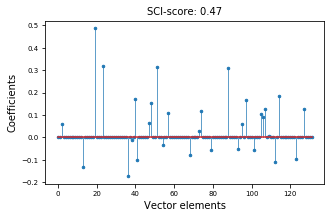

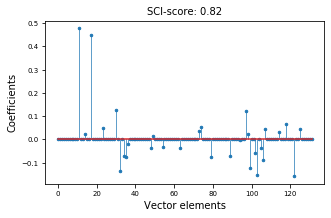

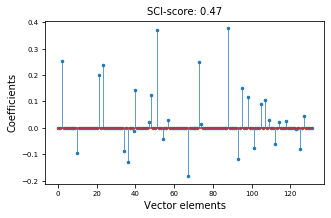

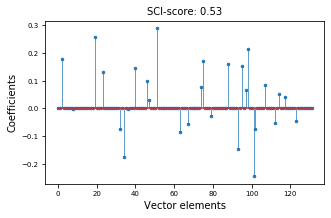

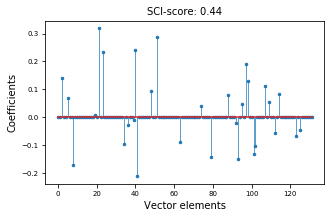

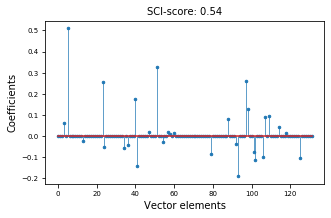

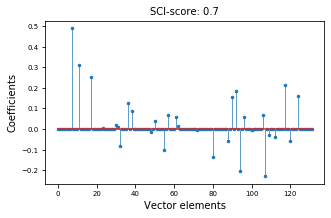

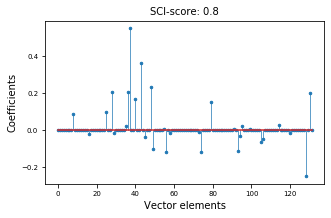

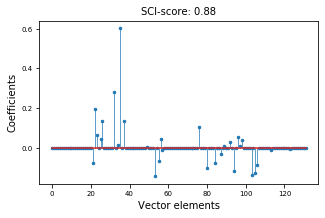

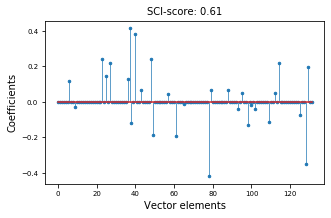

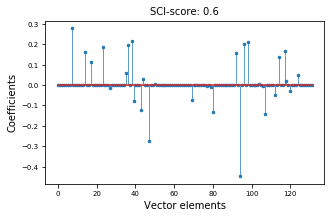

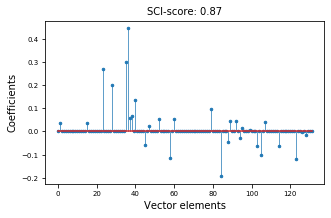

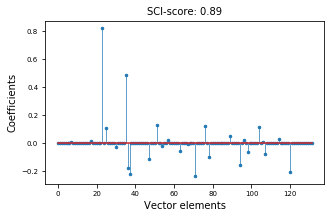

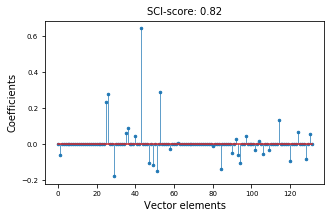

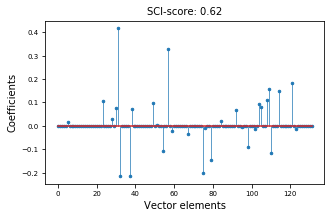

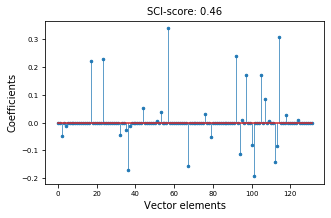

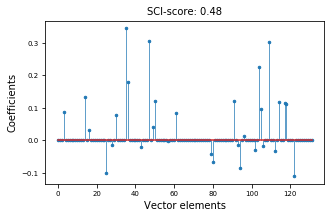

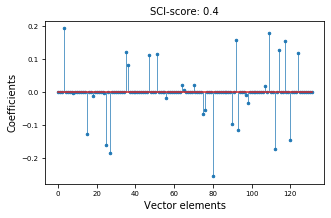

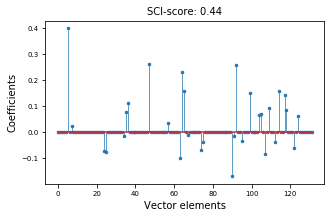

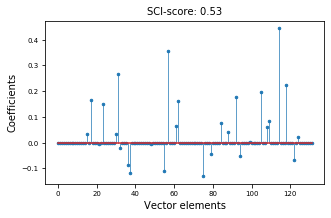

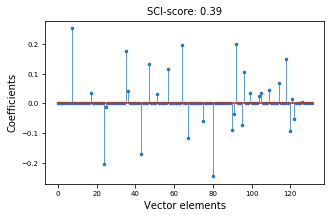

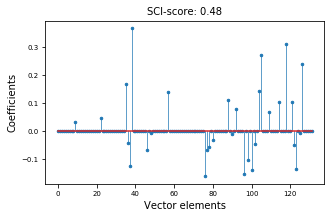

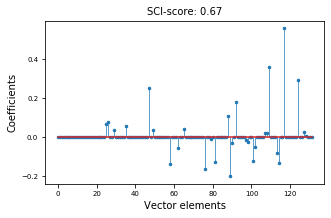

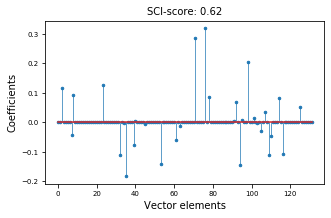

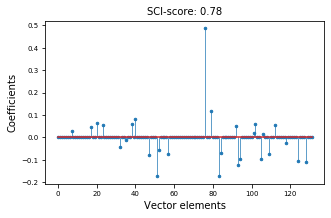

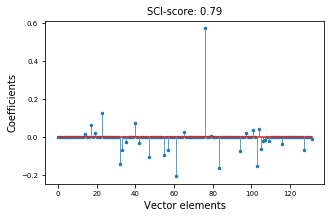

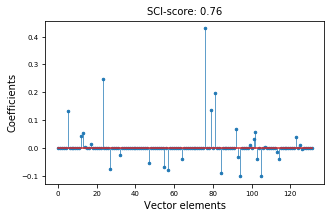

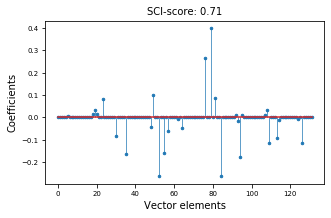

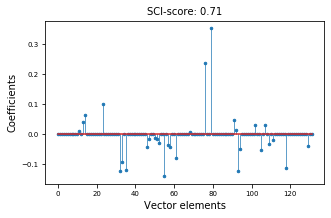

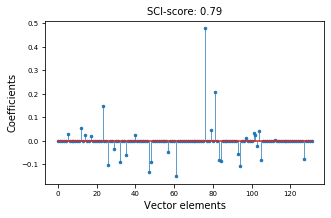

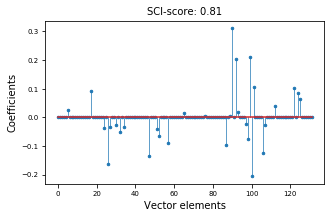

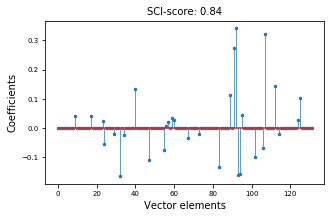

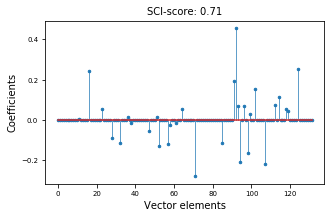

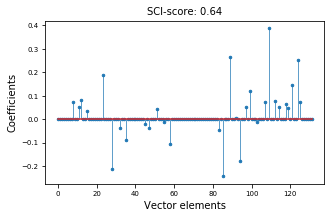

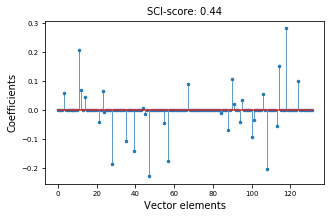

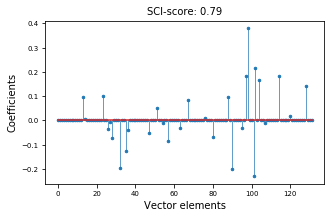

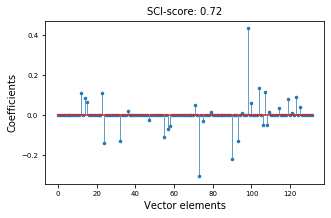

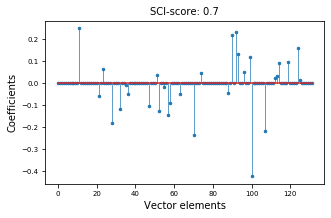

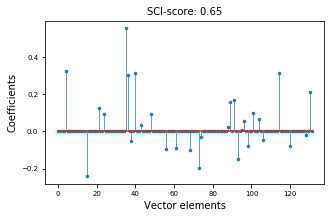

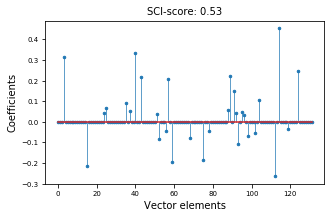

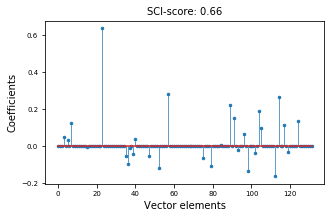

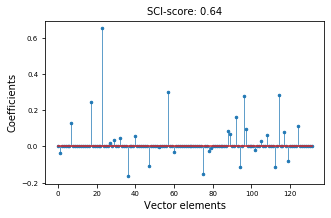

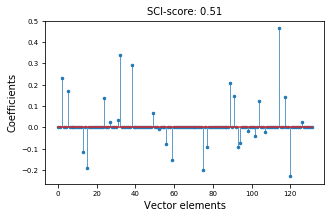

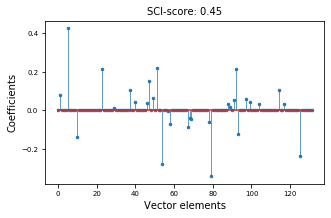

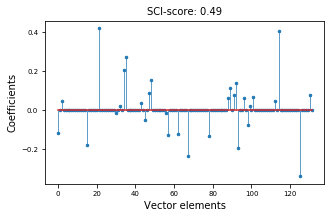

In [11]:
path = os.path.join(parentdir, 'Figures')

x = np.arange(len(results['coeff_vecs'][0]))
num_predicted = len(results['coeff_vecs'])

for i in range(num_predicted):
    label = TestSet['y'][i]
    predicted = results['pred'][i]
    file = TestSet['files'][i]
    print(f"### Plot for {label} number {i}, filename: {file} ###")
    sci_score = round(results['sci_scores'][i], 2)
    plt.figure(figsize=(5,3))
    plt.title(f'SCI-score: {sci_score}', fontdict=font_large)
    #label = f"SCI score: {results['sci_scores'][i]}"
    markerline, stemlines, baseline = plt.stem(x, results['coeff_vecs'][i])
    plt.setp(stemlines, 'linewidth', 0.7)
    plt.setp(markerline, markersize = 2.5)
    plt.setp(markerline, 'linewidth', 1)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.xlabel('Vector elements', fontdict=font_large)
    plt.ylabel('Coefficients', fontdict=font_large)
    #label = f"SCI score: {results['sci_scores'][i]}"
    #plt.set_label([label])
    #plt.legend()
    #plt.savefig(os.path.join(path, f'coeffs_pca_{label}_{i}.png'))

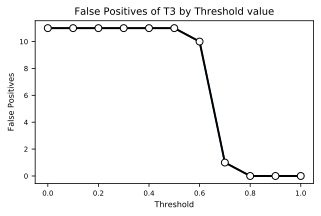

In [7]:
### Rec. Rate ###
fig = plt.figure(figsize=(5,3))
plt.plot(thresholds, rec_rate)
#plt.scatter(thresholds, fals, c='g')
plt.plot(thresholds, rec_rate, '-ok', color='black',
         markersize=7, linewidth=2,
         markerfacecolor='white')
plt.xlabel('Threshold', fontdict=font_small)
plt.ylabel('False Positives', fontdict=font_small)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
#plt.grid()
plt.title('False Positives of T3 by Threshold value', fontdict=font_large)
plt.show()
fig.savefig(f'Figures/false_positives.svg')

## Residuals

### Plot for obj1 number 0, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_6.JPG ###
### Plot for obj1 number 1, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_7.JPG ###
### Plot for obj1 number 2, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_5.JPG ###
### Plot for obj1 number 3, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_4.JPG ###
### Plot for obj1 number 4, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_3.JPG ###
### Plot for obj1 number 5, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_2.JPG ###
### Plot for obj1 number 6, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj1/obj1_8.JPG ###
### Plot for 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

### Plot for obj2 number 23, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_7.JPG ###
### Plot for obj2 number 24, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_6.JPG ###
### Plot for obj2 number 25, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_4.JPG ###
### Plot for obj2 number 26, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_5.JPG ###
### Plot for obj2 number 27, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_1.JPG ###


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

### Plot for obj2 number 28, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_2.JPG ###
### Plot for obj2 number 29, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj2/obj2_3.JPG ###
### Plot for obj3 number 30, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj3/obj3_4.JPG ###
### Plot for obj3 number 31, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj3/obj3_5.JPG ###
### Plot for obj3 number 32, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj3/obj3_7.JPG ###
### Plot for obj3 number 33, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj3/obj3_6.JPG ###


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

### Plot for obj3 number 34, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj3/obj3_2.JPG ###
### Plot for obj3 number 35, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj3/obj3_3.JPG ###


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

### Plot for obj3 number 36, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj3/obj3_1.JPG ###
### Plot for obj3 number 37, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj3/obj3_8.JPG ###
### Plot for obj4 number 38, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj4/obj4_1.JPG ###
### Plot for obj4 number 39, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj4/obj4_2.JPG ###
### Plot for obj4 number 40, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj4/obj4_3.JPG ###
### Plot for obj4 number 41, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj4/obj4_7.JPG ###


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until ex

### Plot for obj4 number 42, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj4/obj4_6.JPG ###
### Plot for obj4 number 43, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj4/obj4_4.JPG ###
### Plot for obj4 number 44, filename: /Users/juliagraham/IT/MasterThesis2021/dmd-and-cs-for-3D-object-detection/testReal/obj4/obj4_5.JPG ###


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


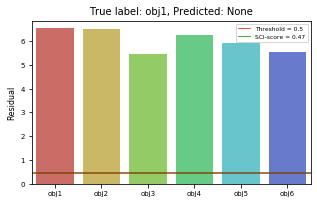

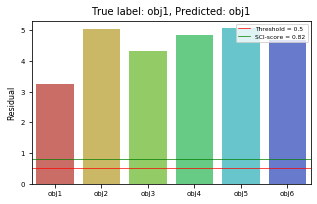

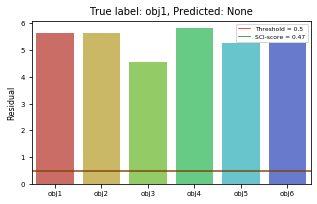

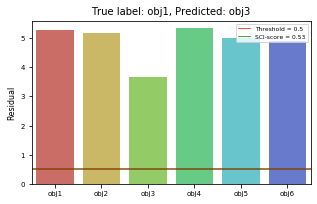

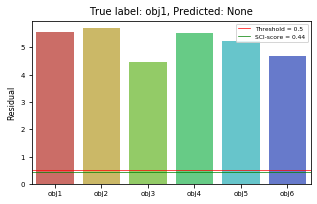

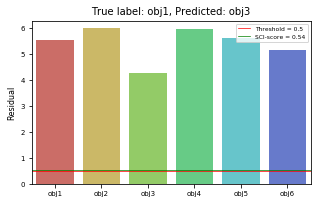

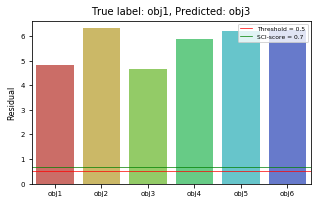

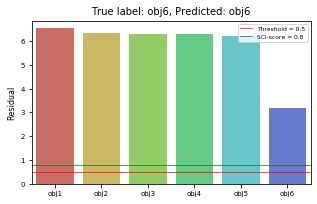

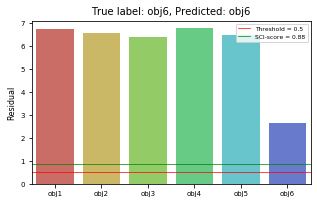

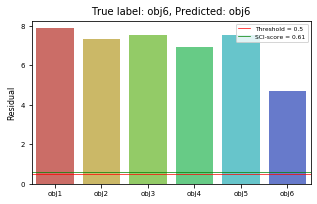

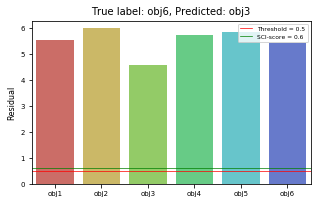

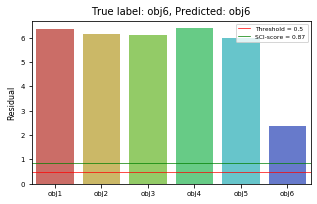

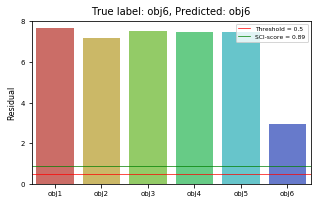

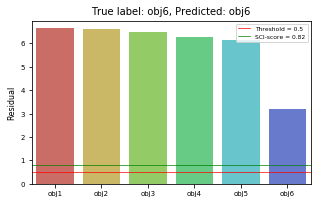

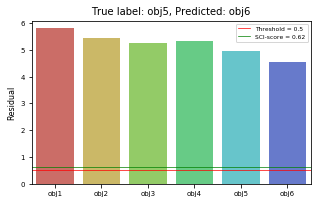

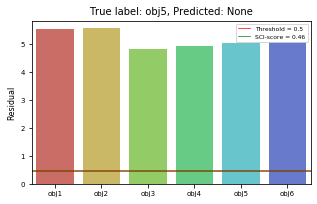

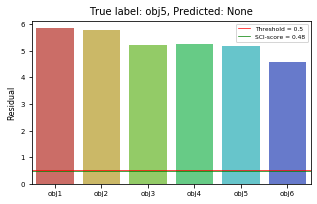

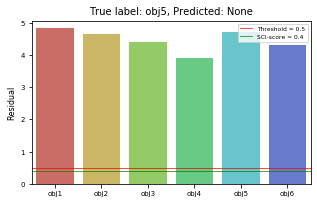

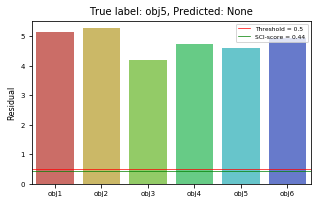

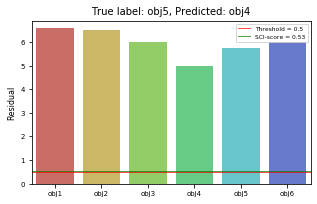

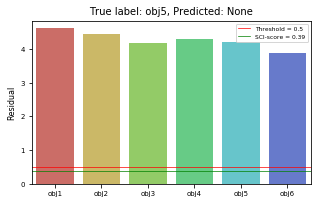

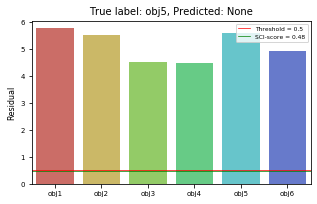

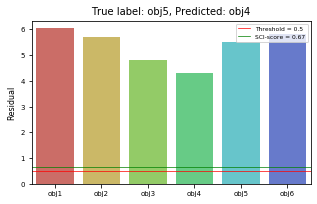

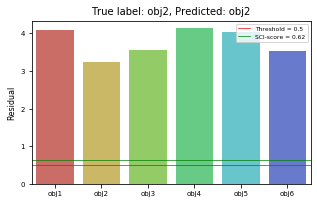

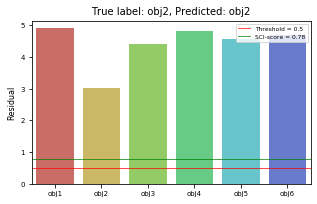

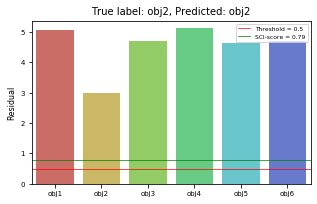

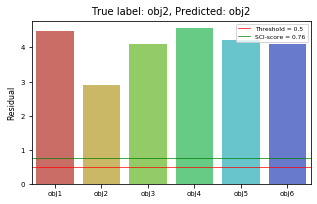

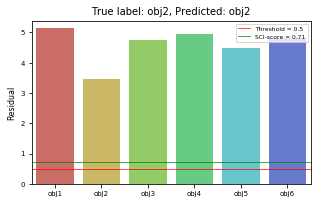

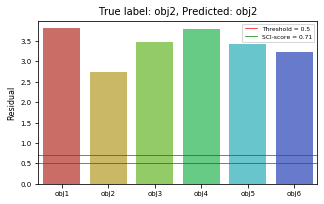

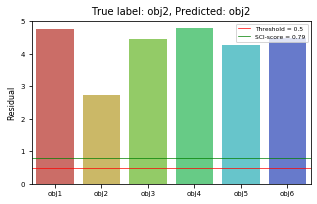

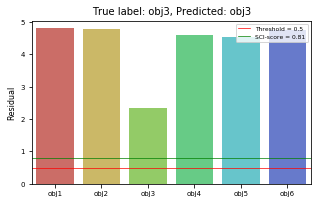

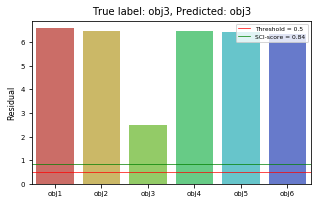

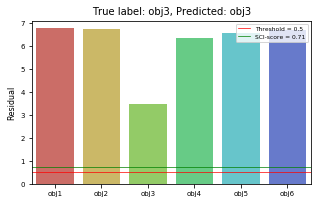

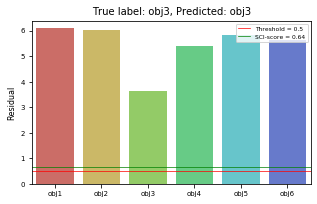

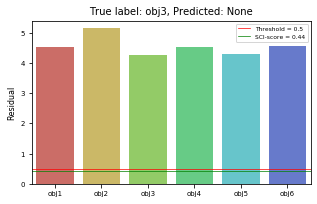

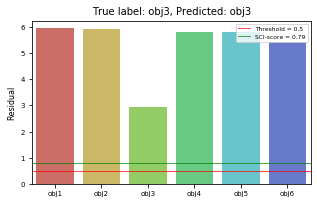

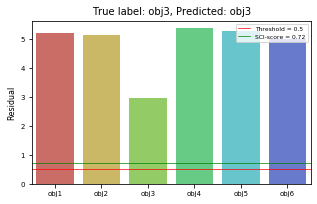

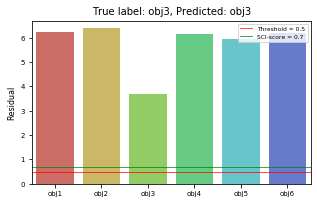

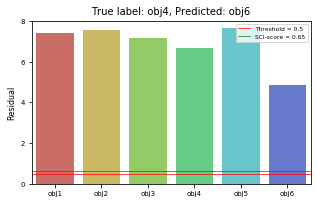

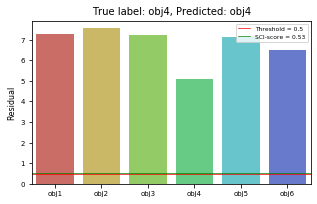

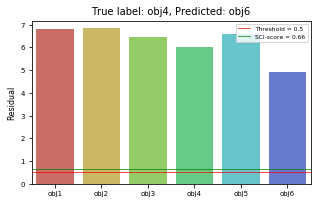

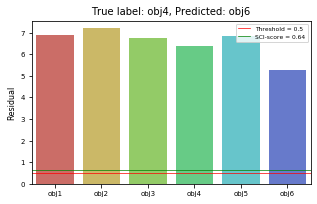

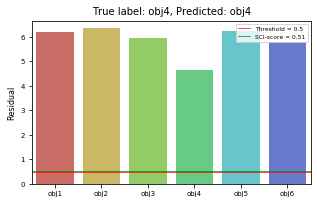

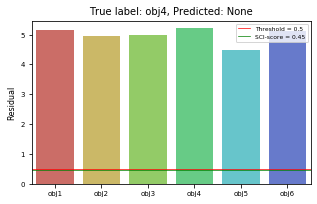

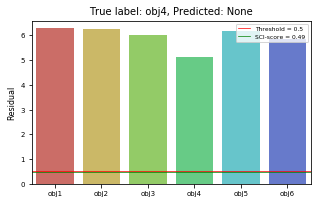

In [15]:
### Plot residuals PCA ###
i = 0

#palette = sns.color_palette("Set2")
#palette = sns.color_palette('deep')
#palette = sns.color_palette("Paired")
palette = sns.color_palette("hls", 8)
#palette = sns.color_palette("tab10")

num_preds = len(results['coeff_vecs'])
classes = np.unique(TrainSet['y'])

for i in range(num_preds):
    res_vec = results['residuals'][i]
    sci_score = round(results['sci_scores'][i], 2)
    label = TestSet['y'][i]
    predicted = results['pred'][i]
    file = TestSet['files'][i]
    print(f"### Plot for {label} number {i}, filename: {file} ###")
    
    plt.figure(figsize=(5,3))
    #sns.set_palette("pastel")
    graph = sns.barplot(x=classes, y=res_vec, palette=palette)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)
    plt.ylabel('Residual', fontdict = font_small)
    plt.title(f'True label: {label}, Predicted: {predicted}', fontdict=font_large)
    graph.axhline(threshold, color='r', label=f'Threshold = {threshold}', lw=0.7)
    graph.axhline(sci_score, color='g', label=f'SCI-score = {sci_score}', lw=0.7)
    
    plt.legend(bbox_to_anchor=(1, 1), loc=1, prop={"size":6})
    #plt.savefig(os.path.join(path, f'res_pca_{label}_{i}.png'))